# Stock Prediction using Stocker

Stocker ("stock explorer") is a Python-based toolkit for stock analysis and prediction. It is built on the quandl library for financial data, the prophet library from Facebook for additive models, numpy and pandas for data manipulation, and matplotlib for visualization. 

This notebook will document some of the basic capabilities of Stocker for prediction. First, I have to recommend against playing the stock market on a daily basis, with or without Stocker! Primarily I developed this tool to gain more experience with time series analysis and object-oriented programming. To see the code for Stocker, check out stocker.py and to see a notebook with analysis examples, look at the [Stocker Analysis Usage notebook](https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Analysis%20Usage.ipynb). 

In [1]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt

%matplotlib inline

## Import the Stocker Class

In [2]:
from stocker import Stocker

### Instantiate a Stocker object 

We will be looking at Amazon stock data throughout this example. To retrieve the data, we pass the ticker to the stocker class and assign it to a variable. 

In [3]:
vz = Stocker('VZ')

VZ Stocker Initialized. Data covers 1999-08-17 to 2019-08-16.


The Stocker object has a number of attributes and methods we can use for analysis and prediction. The main methods we will use in this notebook are `Stocker.create_prophet_model(), Stocker.changepoint_prior_analysis(), Stocker.changepoint_prior_validation(), Stocker.evaluate_prediction(),` and `Stocker.predict_future()`.

The most critical attributes for a forecast are `Stocker.changepoint_prior_scale, Stocker.training_years`, and the seasonalities included in the model. 

### Basic Plot of Stock History

We have a little over 20 years of SPY price history. Let's see what that looks like in its entirety.

Maximum Adj. Close = 69.50 on 1999-10-04.
Minimum Adj. Close = 25.08 on 2008-10-24.
Current Adj. Close = 65.38 on 2019-08-16.

            timestamp     open     high      low   close    volume         ds  \
index                                                                           
2019-08-16 2019-08-16  56.4700  56.6900  55.4200  56.650  11810700 2019-08-16   
2019-08-15 2019-08-15  55.5300  56.5800  55.4200  56.300  12093400 2019-08-15   
2019-08-14 2019-08-14  56.0400  56.5200  55.4900  55.720  15041200 2019-08-14   
2019-08-13 2019-08-13  55.6400  56.5000  55.5199  56.370  11016500 2019-08-13   
2019-08-12 2019-08-12  55.8500  55.8900  55.0700  55.690  10407800 2019-08-12   
2019-08-09 2019-08-09  55.6500  56.0600  55.4650  55.780   8948000 2019-08-09   
2019-08-08 2019-08-08  55.3600  55.8260  54.9900  55.820  11335900 2019-08-08   
2019-08-07 2019-08-07  54.7500  55.5200  54.4100  55.090  11865500 2019-08-07   
2019-08-06 2019-08-06  55.2198  55.5500  54.4700  55.050  18747

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:213: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['timestamp'] >= start_date.date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:214: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['timestamp'] <= end_date.date())]
C:\Users\manas\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method.

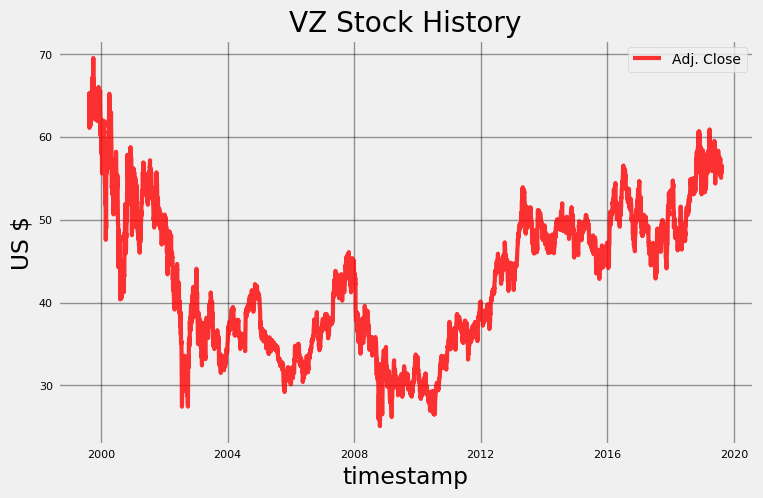

In [4]:
vz.plot_stock()

Looks predictable right? 

### Plot of Daily Changes

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:213: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['timestamp'] >= start_date.date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:214: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['timestamp'] <= end_date.date())]


Maximum Daily Change = 4.38 on 2000-07-03.
Minimum Daily Change = -2.94 on 1999-10-05.
Current Daily Change = 0.50 on 2019-08-16.

            timestamp     open     high      low   close    volume         ds  \
index                                                                           
2019-08-16 2019-08-16  56.4700  56.6900  55.4200  56.650  11810700 2019-08-16   
2019-08-15 2019-08-15  55.5300  56.5800  55.4200  56.300  12093400 2019-08-15   
2019-08-14 2019-08-14  56.0400  56.5200  55.4900  55.720  15041200 2019-08-14   
2019-08-13 2019-08-13  55.6400  56.5000  55.5199  56.370  11016500 2019-08-13   
2019-08-12 2019-08-12  55.8500  55.8900  55.0700  55.690  10407800 2019-08-12   
2019-08-09 2019-08-09  55.6500  56.0600  55.4650  55.780   8948000 2019-08-09   
2019-08-08 2019-08-08  55.3600  55.8260  54.9900  55.820  11335900 2019-08-08   
2019-08-07 2019-08-07  54.7500  55.5200  54.4100  55.090  11865500 2019-08-07   
2019-08-06 2019-08-06  55.2198  55.5500  54.4700  55.050  1

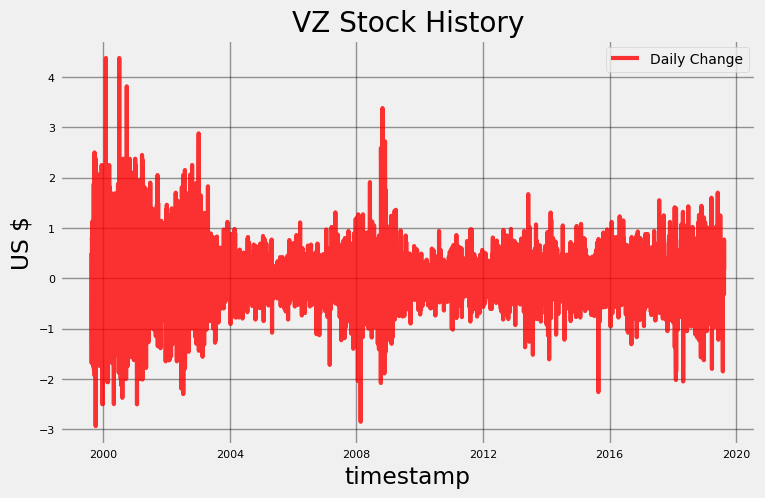

In [5]:
vz.plot_stock(stats=['Daily Change'])

There have been some extreme changes in absolute magnitude recently, but these are not as large as they seem because the price of the stock has increased. We could change the plot to have percentage change on the y-axis. There do not appear to be trends with regards to the changes in one direction or the other. However, we know the stock has increased in value, so the overall average daily change must be slightly positive. 

## Examine Trends/Patterns

We can create a basic model (with no predictions) trained on the past 3 years of data to inspect any trends and patterns in the data. 

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:482: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  stock_history = self.stock[self.stock['timestamp'] > (self.max_date - pd.DateOffset(years = self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


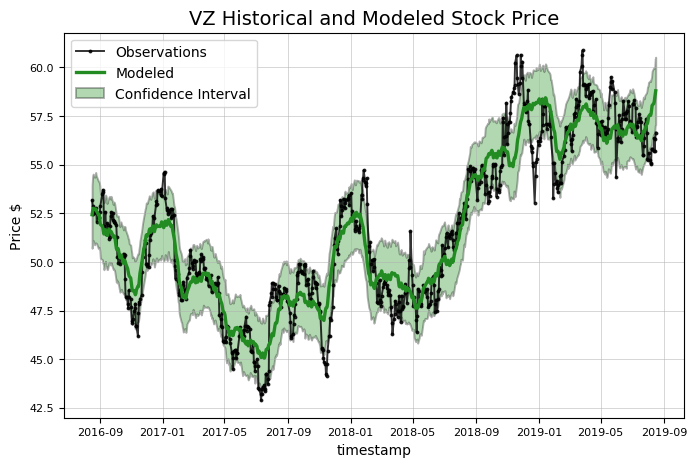

In [6]:
model, model_data = vz.create_prophet_model()

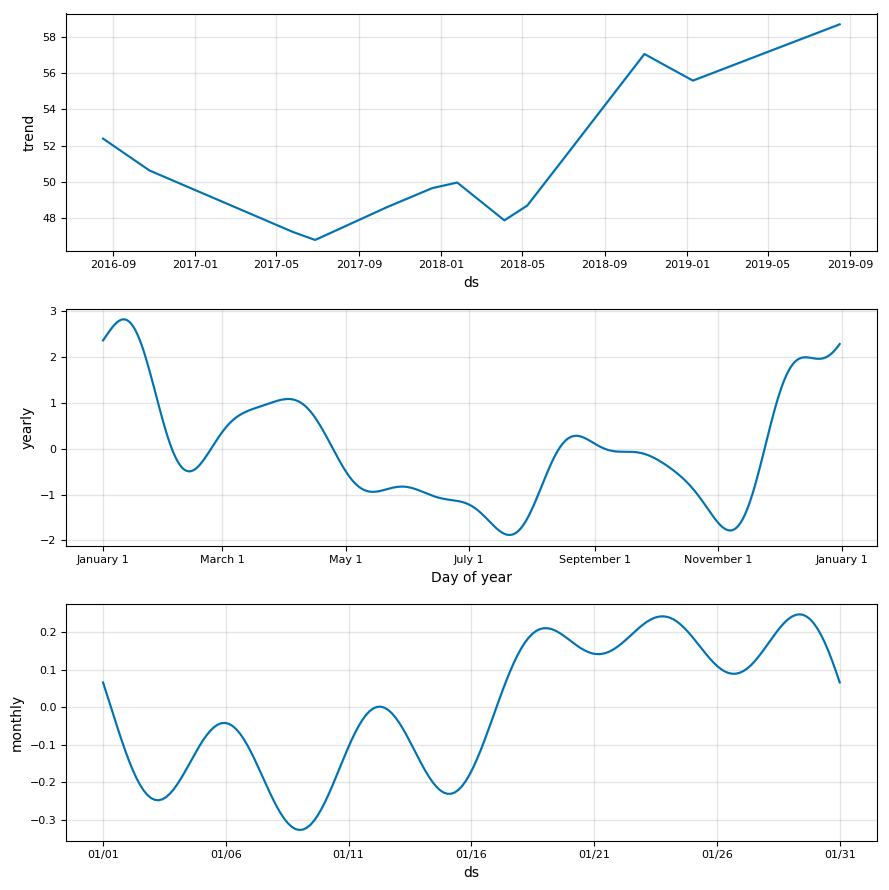

In [7]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

### Test Addition of a Weekly Seasonality

Although it is unlikely, there might be a significant weekly component which would improve the model. Let's add it in and look at the pattern. 

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:482: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  stock_history = self.stock[self.stock['timestamp'] > (self.max_date - pd.DateOffset(years = self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


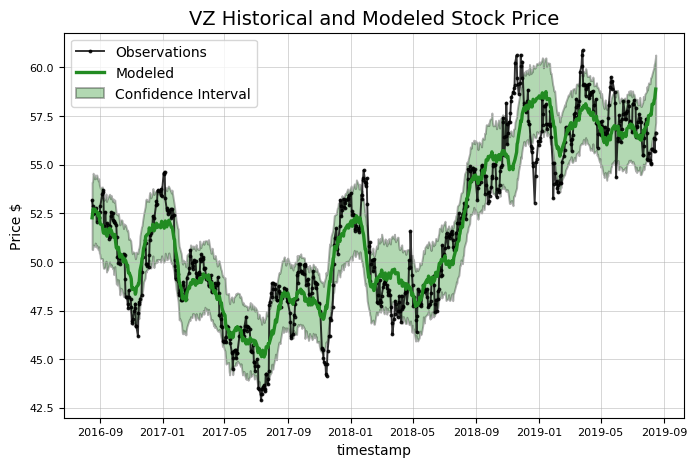

In [8]:
vz.weekly_seasonality=True
model, model_data = vz.create_prophet_model()

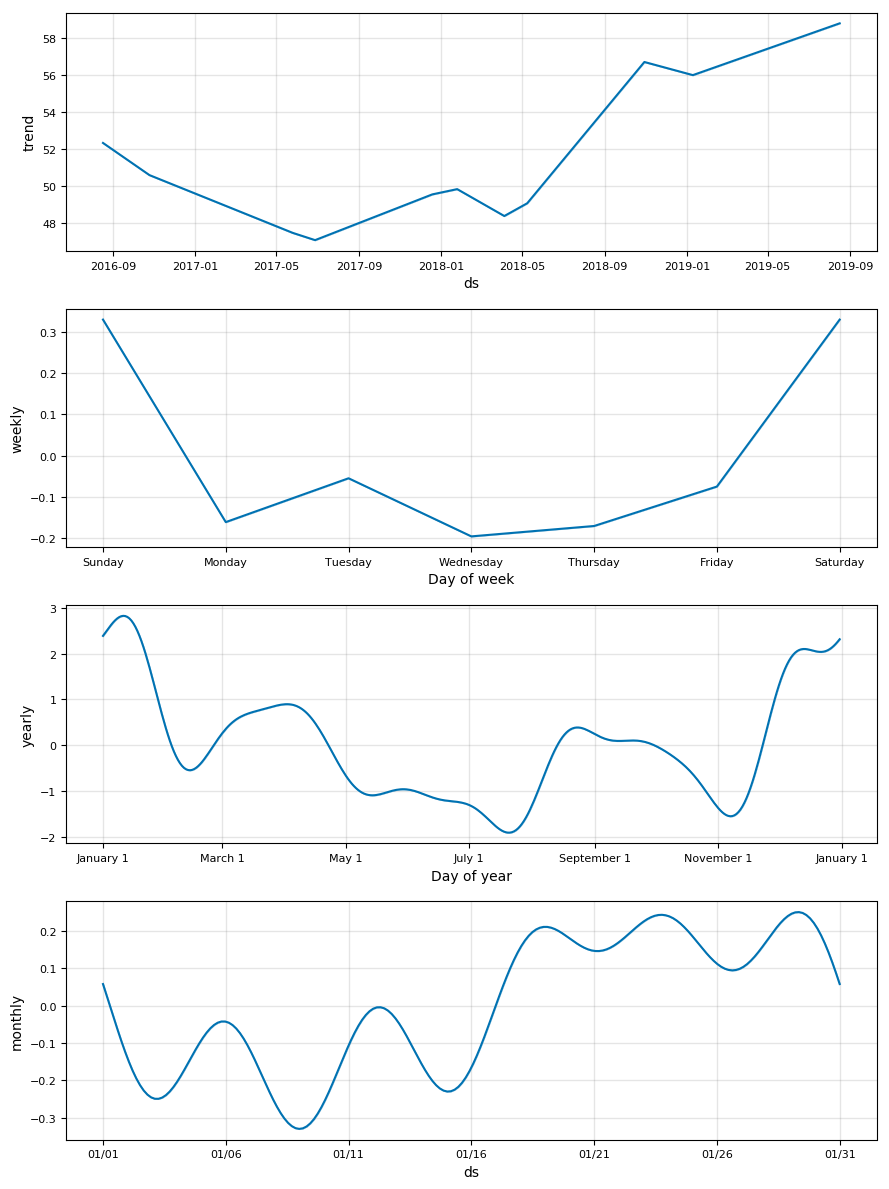

In [9]:
model.plot_components(model_data)
plt.show()

Maybe there is a slight weekly pattern? For now, we can remove that seasonality and then evaluate models with and without it to see the effect on predictions.

In [10]:
vz.weekly_seasonality=False

# First Predictions

We can make a prediction for any number of specified days using the create model method. The prediction also includes the uncertainty interval, a necessity when making estimates about the future! 

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:482: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  stock_history = self.stock[self.stock['timestamp'] > (self.max_date - pd.DateOffset(years = self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


Predicted Price on 2019-08-31 = $59.18


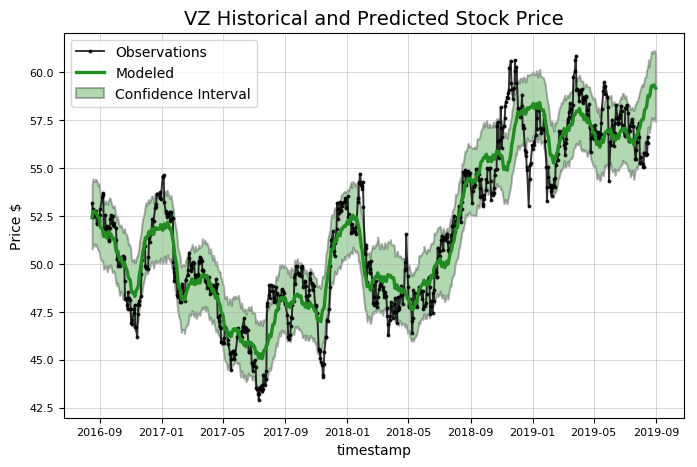

In [11]:
model, model_data = vz.create_prophet_model(days=15)

The model predicts a continuous increase in price. Notice how the model for both the past data and the future data is smoother than the actual observations. The model smooths out the noise on the small scale in order to make more accurate general predictions over a long period. In other words, an additive model will be more accurate at capturing general movements rather than specific daily fluctuations. 

# Evaluate Model

Anyone can make stock predictions by simply picking a number. For our predictions to be meaningful, we must evaluate them on real data. 

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past year and train on the 3 years prior to the test period. 

To quantify the accuracy of our predictions, we can find the average dollar error on both the testing and training data, the percentage the actual price was in the predicted confidence interval, and the percentage of times we predicted the correct direction for the stock. 

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:535: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] < start_date.date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:536: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['timestamp'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:539: FutureWarning: Comparing Series of 


Prediction Range: 2018-08-16 to 2019-08-16.

Predicted price on 2019-08-15 = $54.38.
Actual price on    2019-08-15 = $54.27.

Average Absolute Error on Training Data = $1.03.
Average Absolute Error on Testing  Data = $4.71.

When the model predicted an increase, the price increased 41.32% of the time.
When the model predicted a  decrease, the price decreased  50.39% of the time.

The actual value was within the 80% confidence interval 55.78% of the time.


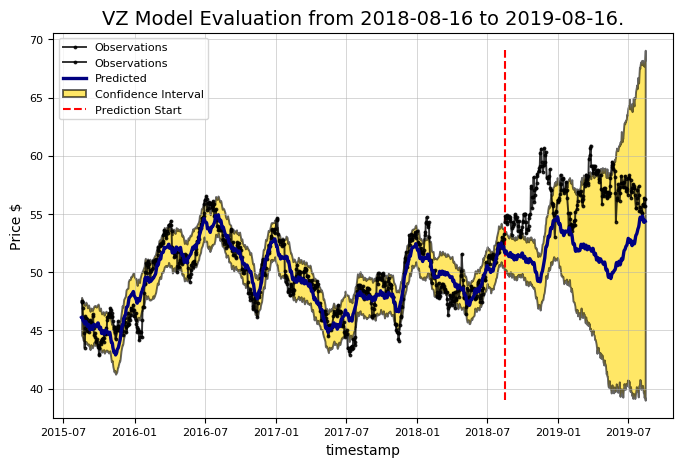

In [12]:
vz.evaluate_prediction()

These predictions are not very good! However, it is likely that the model hyperparameters (settings) are not optimized for our problem. There are a number of these knobs we can adjust to improve the model, with perhaps the most important the changepoint prior scale, or the amount of weight the model assigns to shifts in the data.

# Changepoint Prior Scale Selection

Changepoints represent where a time series goes from increasing to decreasing or from increasing slowly to increasingly rapidly. They occur at the places with the [greatest change in the rate of the time series](https://facebook.github.io/prophet/docs/trend_changepoints.html). 

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

The Stocker class contains two different ways to choose an appropriate prior: grahically and quantitatively with validation data.

## Graphical Comparison

We will start with a range of four priors to compare. First, we can graphically compare them to get an intuition of how the priors affect the model.  

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:423: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] > (max(self.stock['timestamp']) - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\

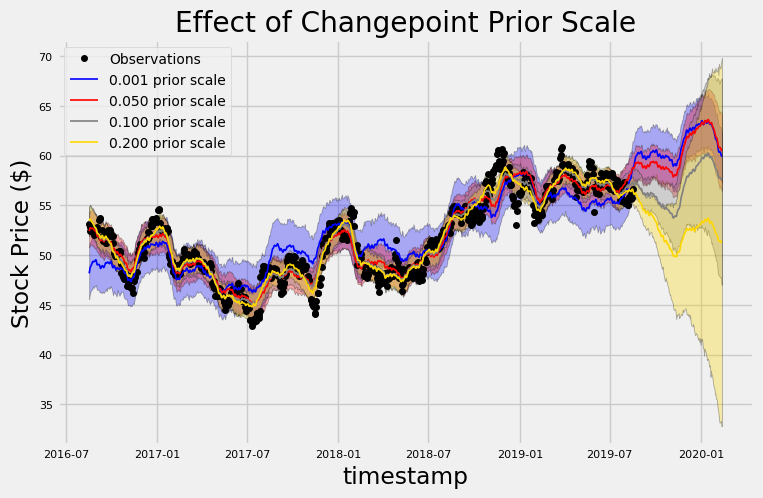

In [13]:
vz.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

## Quantitative Comparison

This gives us an idea of how well each prior fits the training data, but no numbers to back up our intuitions. The changepoint prior validation method is designed to provide numerical backing. We are testing from 2017-01-18 to 2018-01-18, so we need to make sure to use a different validation range. We will select two years prior to the testing date range. The model will be trained on the three years prior to the validation period.

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:954: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] > (start_date - pd.DateOffset(years=self.training_years)).date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:955: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['timestamp'] < start_date.date())]
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:958: FutureWarning: Comparing Series of 


Validation Range 2017-01-18 to 2018-01-18.



C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


     cps  train_err  train_range   test_err  test_range
0  0.001   1.748815     5.535129   4.289418    5.539471
1  0.050   0.922416     2.992452   8.232878    7.457488
2  0.100   0.712328     2.309360  17.906635   29.364214
3  1.000   0.636562     2.072214  21.850624   58.861953


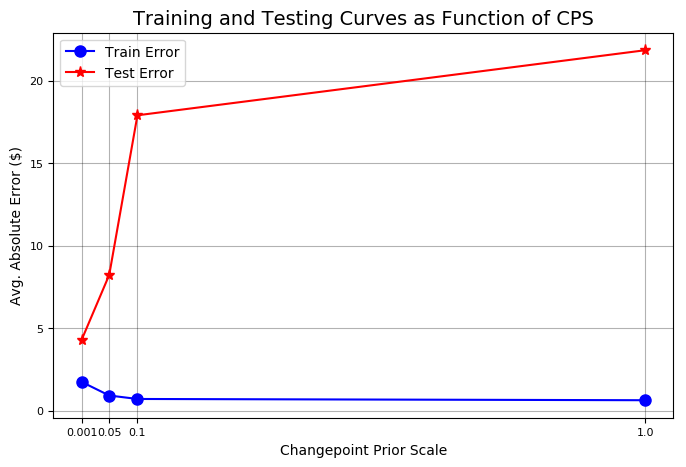

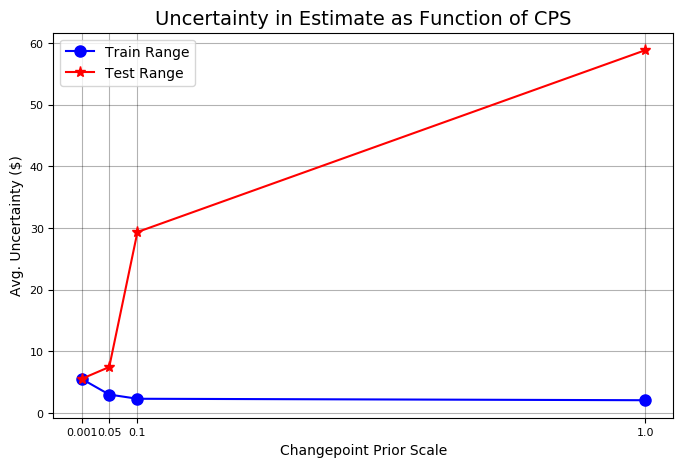

In [14]:
vz.changepoint_prior_validation(start_date='2017-01-18', end_date='2018-01-18', changepoint_priors=[0.001, 0.05, 0.1, 1])

The test error decreases as we increase the prior. Stocks change considerably on a day to day basis, and a more flexible model can account for these fluctuations.

### Refine Search 

We can evaluate additional changepoint prior scales to determine the best fit for our data. 

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:954: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] > (start_date - pd.DateOffset(years=self.training_years)).date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:955: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['timestamp'] < start_date.date())]
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:958: FutureWarning: Comparing Series of 


Validation Range 2017-01-18 to 2018-01-18.



C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


    cps  train_err  train_range  test_err  test_range
0  0.01   1.058283     3.483765  8.249728    4.308115
1  0.02   1.002604     3.291660  7.096010    4.841528
2  0.03   0.969259     3.164141  7.383155    5.444717
3  0.04   0.941498     3.065708  7.927257    6.469402
4  0.05   0.922416     2.991500  8.232878    7.425688


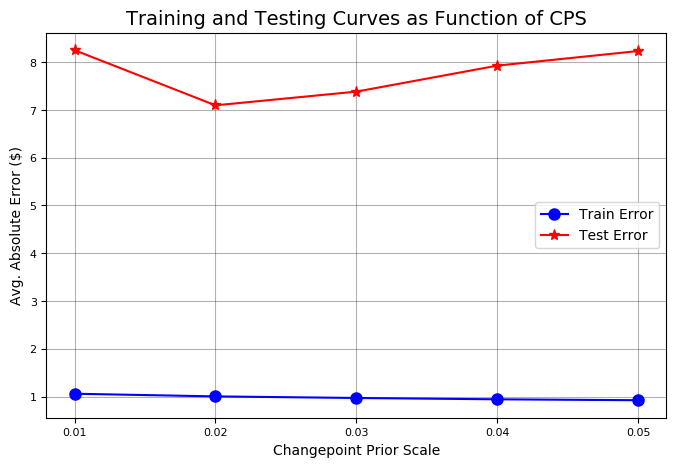

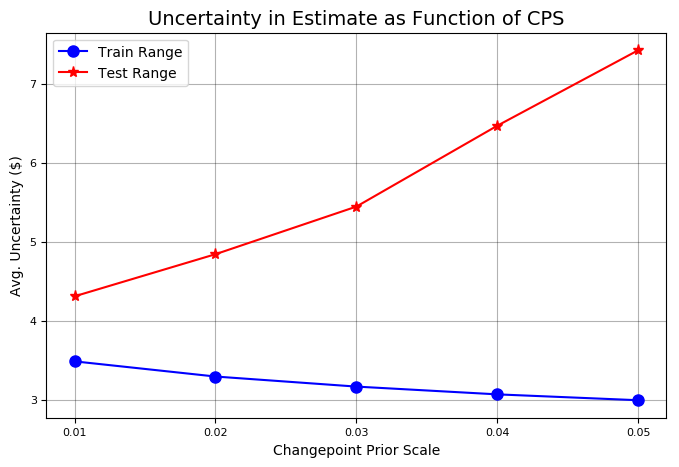

In [15]:
vz.changepoint_prior_validation(start_date='2017-01-18', end_date='2018-01-18', changepoint_priors=[0.01, 0.02,0.03, 0.04, 0.05])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object. The prior is one of the attiributes and we can change it like any other variable. At this point, we could also change the seasonalities or the amount of training data to achieve the best performance on the testing data

In [16]:
vz.changepoint_prior_scale = .1

### Evaluate Improved Model

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:535: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] < start_date.date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:536: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['timestamp'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:539: FutureWarning: Comparing Series of 


Prediction Range: 2018-08-16 to 2019-08-16.

Predicted price on 2019-08-15 = $53.39.
Actual price on    2019-08-15 = $54.27.

Average Absolute Error on Training Data = $0.90.
Average Absolute Error on Testing  Data = $5.61.

When the model predicted an increase, the price increased 42.74% of the time.
When the model predicted a  decrease, the price decreased  51.59% of the time.

The actual value was within the 80% confidence interval 68.13% of the time.


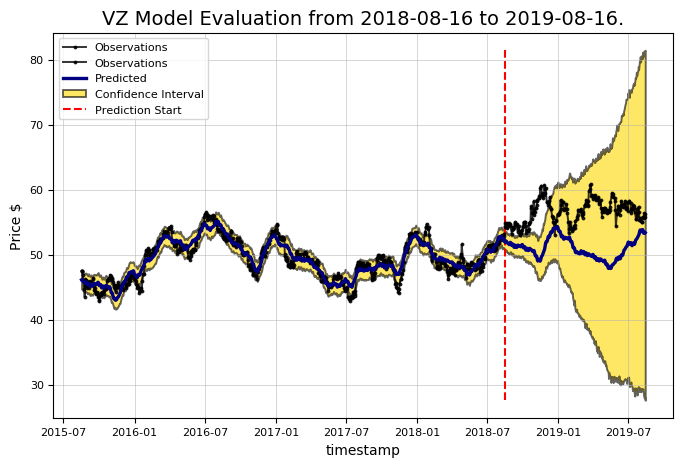

In [17]:
vz.evaluate_prediction()

#### Add in weekly seasonality and evaluate

In [18]:
vz.weekly_seasonality=True

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:535: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] < start_date.date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:536: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['timestamp'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:539: FutureWarning: Comparing Series of 


Prediction Range: 2018-08-16 to 2019-08-16.

Predicted price on 2019-08-15 = $52.63.
Actual price on    2019-08-15 = $54.27.

Average Absolute Error on Training Data = $0.89.
Average Absolute Error on Testing  Data = $6.12.

When the model predicted an increase, the price increased 42.15% of the time.
When the model predicted a  decrease, the price decreased  51.16% of the time.

The actual value was within the 80% confidence interval 67.73% of the time.


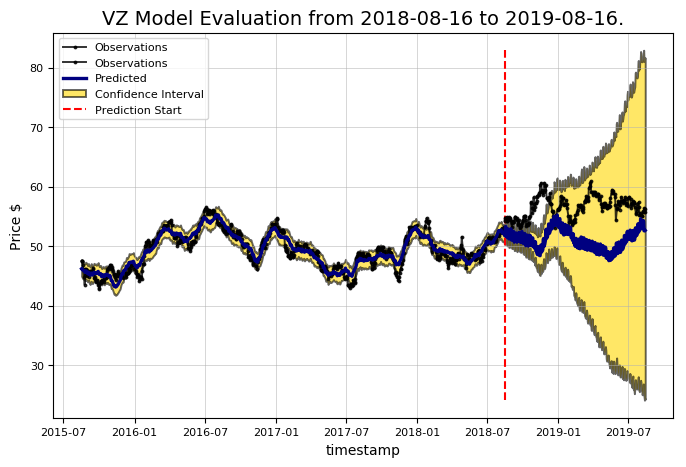

In [19]:
vz.evaluate_prediction()

The best changepoint prior scale for our model is 0.5 and including the weekly seasonality did not improve the model. Therefore, we will change these settings accordingly. 

In [20]:
vz.changepoint_prior_scale=1
vz.weekly_seasonality=True

## Play the Daily Market

For fun (this should never be done for real) we can "play" the market with our predictions. We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:

1. If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
2. If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
3. If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

We are assuming the "change in price of a share on that day" is the difference between the previous days' closing price and the closing price on our day. For example, if the closing price on Monday was \$14 and the closing price on Tuesday was \$18, we would call that a \$4 change on Tuesday. This is not entirely accurate as stocks prices change a small amount overnight, but it will be acceptable for our game. Now, let's play with the defaults.

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:535: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] < start_date.date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:536: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['timestamp'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:539: FutureWarning: Comparing Series of 

You played the stock market in VZ from 2018-08-16 to 2019-08-16 with 1000 shares.

When the model predicted an increase, the price increased 43.59% of the time.
When the model predicted a  decrease, the price decreased  51.88% of the time.

The total profit using the Prophet model = $970.00.
The Buy and Hold strategy profit =         $-2030.00.

Thanks for playing the stock market!



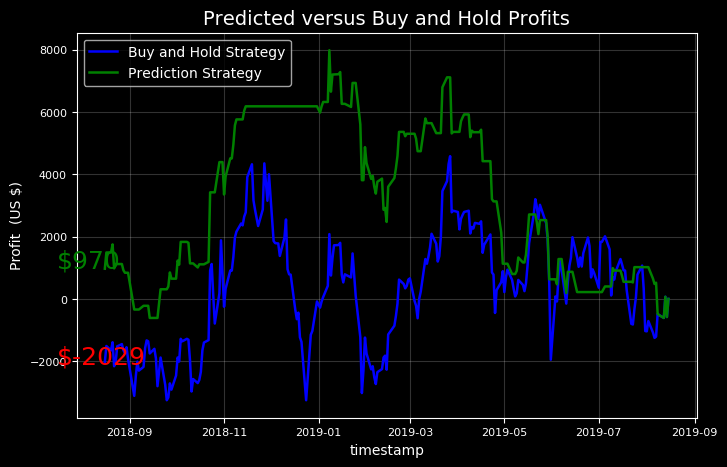

In [21]:
vz.evaluate_prediction(nshares=1000)

Notice that our profits do not depend on the difference between the final predicted price and the actual price, only on the percentage of the time we correctly predicted the direction. We could alter the rules of the game to play it based on predicted values, but for now we can leave it at the rather simple exercise shown here. 

#### Try a Different Period

We can evaluate any time period we like to see if there are times when we beat the buy and hold strategy. More likely is that we will find times when we lose money. Nonetheless, it is important to test over different time frames to see how robust the model is to training data.

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:535: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['timestamp'] < start_date.date()) &
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:536: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['timestamp'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:539: FutureWarning: Comparing Series of 

You played the stock market in VZ from 2007-10-03 to 2009-01-01 with 1000 shares.

When the model predicted an increase, the price increased 49.41% of the time.
When the model predicted a  decrease, the price decreased  49.40% of the time.

The total profit using the Prophet model = $20940.00.
The Buy and Hold strategy profit =         $13830.00.

Thanks for playing the stock market!



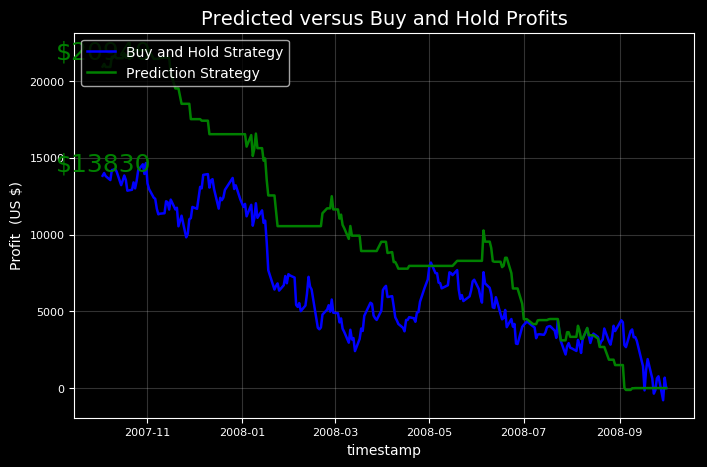

In [22]:
vz.evaluate_prediction(start_date = '2007-10-03', end_date = '2009-01-01', nshares=1000)

# Predict the Future

As a last step, we can predict any number of days into the future. This function automatically trains on the past 3 years and makes predictions with the uncertainty intervals. 

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:870: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[self.stock['timestamp'] > (max(self.stock['timestamp']) - pd.DateOffset(years=self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:881: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised


Predicted Increase: 

    timestamp   estimate    change      upper      lower
2  2019-08-18  56.967297  0.252220  58.113206  55.894044
4  2019-08-20  56.363674  0.070533  57.461712  55.330502
5  2019-08-21  56.368794  0.005120  57.424277  55.287097
6  2019-08-22  56.462011  0.093218  57.594472  55.245032
7  2019-08-23  56.505541  0.043530  57.576375  55.379156
9  2019-08-25  56.706726  0.201185  57.882750  55.476366
11 2019-08-27  56.105354  0.035971  57.277801  54.844389

Predicted Decrease: 

    timestamp   estimate    change      upper      lower
3  2019-08-19  56.293140 -0.674156  57.467064  55.177001
10 2019-08-26  56.069383 -0.637343  57.282713  54.881436
12 2019-08-28  55.958674 -0.146680  57.268790  54.780030
13 2019-08-29  55.838160 -0.120514  57.094435  54.527496
14 2019-08-30  55.719935 -0.118225  57.093854  54.419849


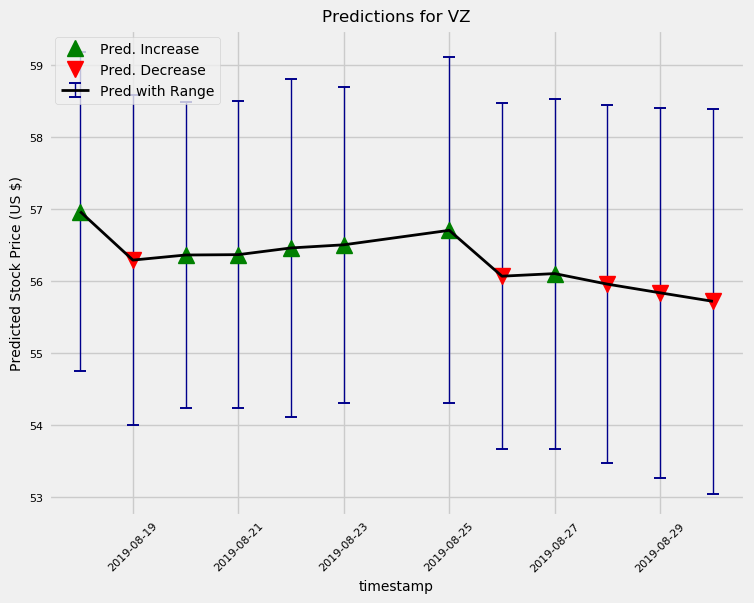

In [23]:
vz.predict_future(days=15)

C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:870: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[self.stock['timestamp'] > (max(self.stock['timestamp']) - pd.DateOffset(years=self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Documents\React-Projects\delphi-oracle\lab\stocker.py:881: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised


Predicted Increase: 

     timestamp   estimate    change      upper      lower
2   2019-08-18  56.967297  0.252220  58.065354  55.907226
4   2019-08-20  56.363674  0.070533  57.468729  55.264294
5   2019-08-21  56.368794  0.005120  57.490985  55.216286
6   2019-08-22  56.462011  0.093218  57.569860  55.310628
7   2019-08-23  56.505541  0.043530  57.708686  55.382860
9   2019-08-25  56.706726  0.201185  57.890354  55.465486
11  2019-08-27  56.105354  0.035971  57.262640  54.929390
16  2019-09-01  55.936489  0.216554  57.267731  54.671217
23  2019-09-08  54.870580  0.300174  56.534173  53.176912
28  2019-09-13  53.759575  0.020045  55.806203  51.605545
30  2019-09-15  54.269576  0.510001  56.440118  51.958980
35  2019-09-20  53.003761  0.075024  56.149677  49.954760
37  2019-09-22  53.452102  0.448342  57.269046  50.389727
44  2019-09-29  52.160506  0.047651  57.534133  47.662634
65  2019-10-20  47.494570  0.097534  57.885949  38.472418
72  2019-10-27  46.385296  0.180843  58.870362  3

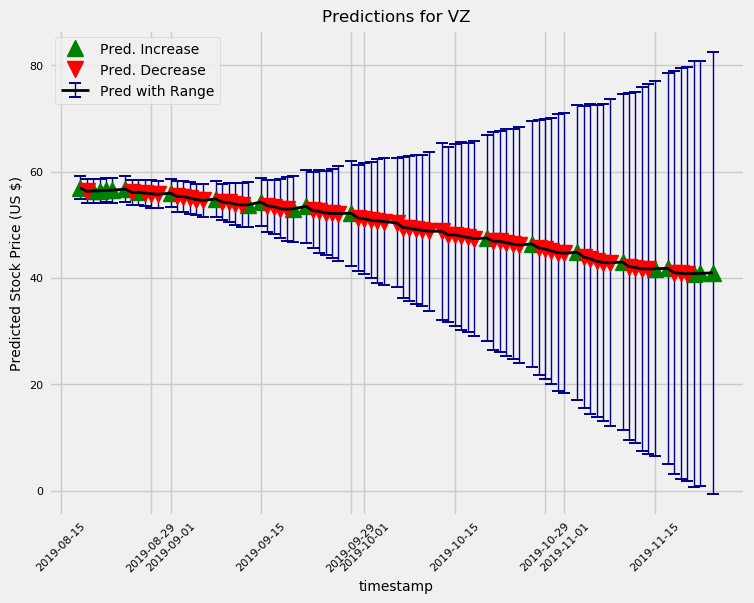

In [24]:
vz.predict_future(days=100)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasted values have some uncertainty, and the next values are made based on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 